In [1]:
import nltk

In [3]:
#nltk.download_shell()

In [4]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
len(messages)

5574

In [16]:
for mes_no, message in enumerate(messages[:10]):
    print(mes_no, message)
    print('----')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
----
1 ham	Ok lar... Joking wif u oni...
----
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
----
3 ham	U dun say so early hor... U c already then say...
----
4 ham	Nah I don't think he goes to usf, he lives around here though
----
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
----
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
----
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
----
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 

In [9]:
import pandas as pd

In [10]:
df_messages = pd.read_csv('SMSSpamCollection', sep='\t',names=['label','message'])

In [12]:
df_messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df_messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
df_messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
df_messages['length'] = df_messages['message'].apply(len)

In [18]:
df_messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
import matplotlib.pyplot
import seaborn as sns

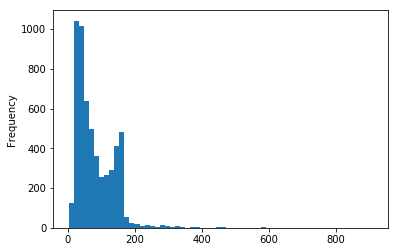

In [22]:
df_messages['length'].plot.hist(bins=60)

In [26]:
df_messages[df_messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1eb5e5f8>,
      dtype=object)

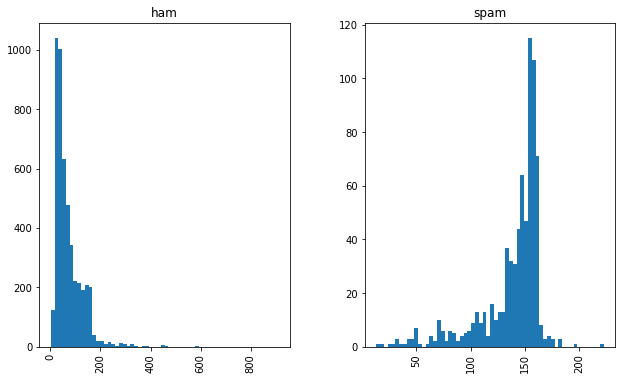

In [29]:
df_messages.hist(column='length',by='label',bins=60,figsize=(10,6))

In [ ]:
#BAG OF WORDS

In [30]:
import string

In [31]:
mess = 'sample message! notice: it has panctuation.'

In [32]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
nopunc = [c for c in mess if c not in string.punctuation]

In [35]:
from nltk.corpus import stopwords

In [36]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
nopunc = ''.join(nopunc)

In [40]:
x=['a','b','c','d']
' + '.join(x)

'a + b + c + d'

In [41]:
nopunc.split()

['sample', 'message', 'notice', 'it', 'has', 'panctuation']

In [42]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [43]:
clean_mess

['sample', 'message', 'notice', 'panctuation']

In [45]:
def text_process(mess):
    """
    remove punctuation
    remove stopwords
    return list of clean words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return clean_mess

In [47]:
df_messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
df_messages['tokens'] = df_messages['message'].apply(text_process)

In [50]:
df_messages.head()

,label,message,length,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."


In [ ]:
# BAG OF WORDS

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df_messages['message'])

In [53]:
len(bow_transformer.vocabulary_)

11425

In [54]:
mess4 = df_messages['message'][3]

In [55]:
mess4

'U dun say so early hor... U c already then say...'

In [56]:
bow4 = bow_transformer.transform([mess4])

In [60]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [62]:
bow_transformer.get_feature_names()[9554]

'say'

In [63]:
messages_bow = bow_transformer.transform(df_messages['message'])

In [64]:
messages_bow.shape

(5572, 11425)

In [65]:
messages_bow.nnz

50548

In [67]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [ ]:
#TF-IDF

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer

In [69]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [70]:
tfidf4 = tfidf_transformer.transform(bow4)

In [71]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [72]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [73]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [78]:
from sklearn.model_selection import train_test_split

In [83]:
X = df_messages['message']
y = df_messages['label']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [85]:
X_train.head()

4028        Yes, princess. Are you going to make me moan?
1310              Ok, be careful ! Don't text and drive !
5469                                              Ok lor.
5375    I cant pick the phone right now. Pls send a me...
3814                Pls i wont belive god.not only jesus.
Name: message, dtype: object

In [ ]:
# DATA PIPELINE

In [86]:
from sklearn.pipeline import Pipeline

In [87]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [88]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a1ee2fae8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [89]:
pred = pipeline.predict(X_test)

In [90]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1475
       spam       1.00      0.65      0.79       197

avg / total       0.96      0.96      0.96      1672



In [74]:
from sklearn.naive_bayes import MultinomialNB